# **Types of CNN**

In [3]:
! pip install -r requirements.txt

     |████████████████████████████████| 126 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 86 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 60 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 64 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 9.5 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 65.2 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 36.7 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 69.1 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 16

In [2]:
!pip install keras
!pip install tensorflow

     |████████████████████████████████| 588.3 MB 21 kB/s s eta 0:00:01
     |████████████████████████████████| 6.0 MB 72.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 68.4 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 81 kB 15.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 68.7 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 63.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 62.0 MB/s eta 0:00:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 4.7 MB 67.4 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 126 kB 68.6 MB/s eta 0:00:01
     |████████████████████████████████| 21.5 MB 1.1 MB/s eta 0:00:011
     |████████████████████████████████| 439 kB 65.2 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 60.4 MB/s eta 

In [4]:
!pip install matplotlib

     |████████████████████████████████| 9.2 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 69.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 60.9 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 98 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 71.5 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
!pip install scikit-learn

     |████████████████████████████████| 9.8 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 53.8 MB/s eta 0:00:01


## ***1. LeNet-5***




In [7]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
import numpy as np

def plot_images_sample(X, Y):
    # Draw plot for images sample
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        plt.xlabel(Y[index])
    plt.show()

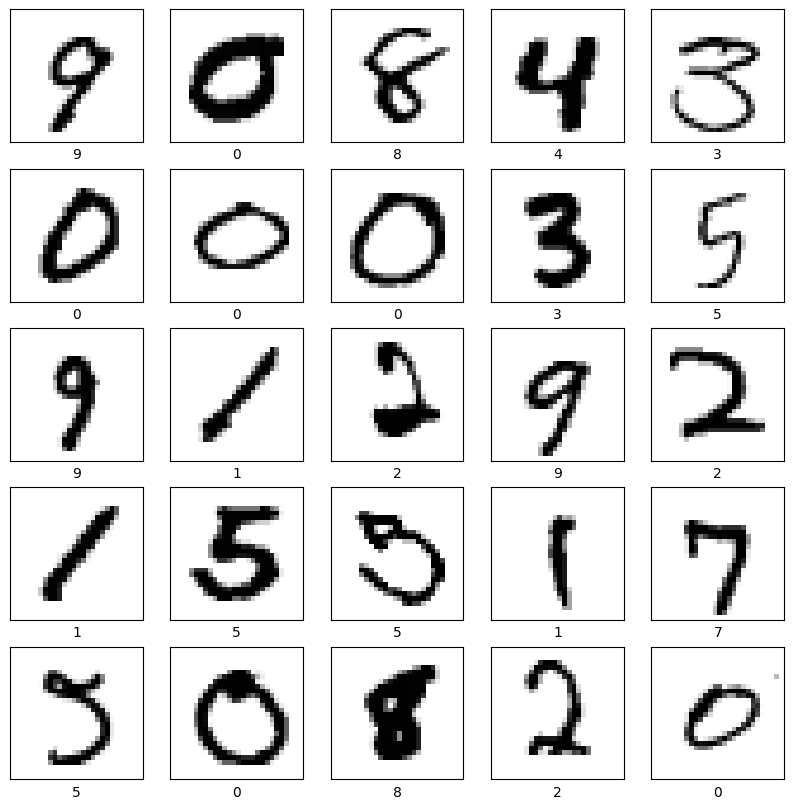

In [10]:
# Draw plot for images sample
plot_images_sample(x_train,y_train)

In [11]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [12]:
# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# Add the first subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Add the second subsampling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

2023-02-18 21:33:14.982066: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-18 21:33:14.982112: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-18 21:33:14.982259: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c983a30ae255): /proc/driver/nvidia/version does not exist
2023-02-18 21:33:14.983093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# Flatten the output from the subsampling layers
model.add(Flatten())

# Add the fully connected layer
model.add(Dense(units=120, activation='relu'))

# Add the final fully connected layer
model.add(Dense(units=84, activation='relu'))

# Add the output layer
model.add(Dense(units=10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [15]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.3108 - accuracy: 0.9090 - val_loss: 0.0918 - val_accuracy: 0.9738
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0792 - accuracy: 0.9760 - val_loss: 0.0599 - val_accuracy: 0.9814
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0507 - val_accuracy: 0.9825
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0424 - val_accuracy: 0.9862
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0349 - val_accuracy: 0.9880
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0409 - val_accuracy: 0.9865
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0353 - val_accuracy: 0.9877

In [9]:
# Evaluate the model
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0335 - accuracy: 0.9896
Test loss: 0.033520206809043884
Test accuracy: 0.9896000027656555


313/313 - 1s - loss: 0.0363 - accuracy: 0.9892 - 1s/epoch - 3ms/step


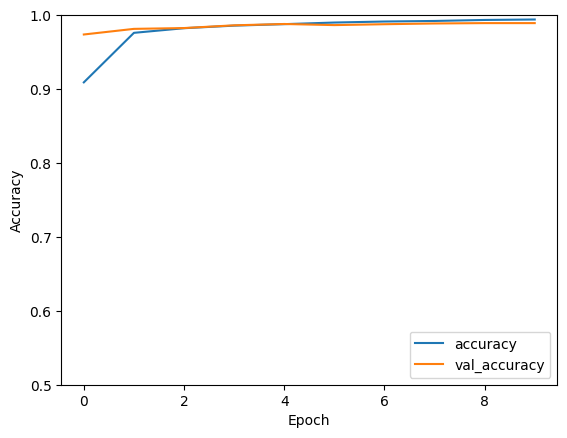

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

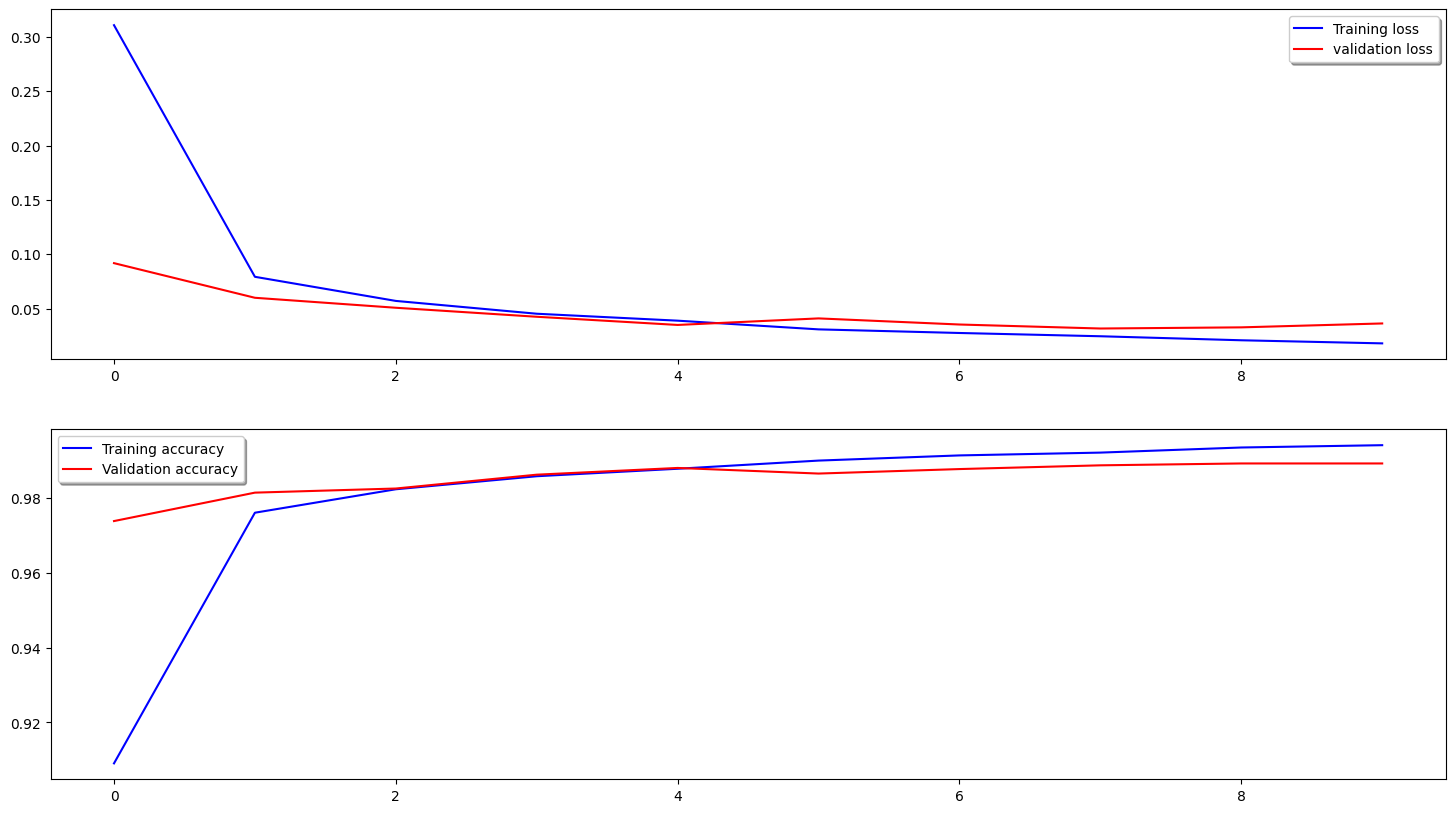

In [17]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [18]:
def get_predictions(X_test):
    # Digits prediction
    predictions = model.predict(X_test)
    predictions = np.argmax(predictions, axis=1)
    return predictions

313/313 [==============================] - 1s 3ms/step


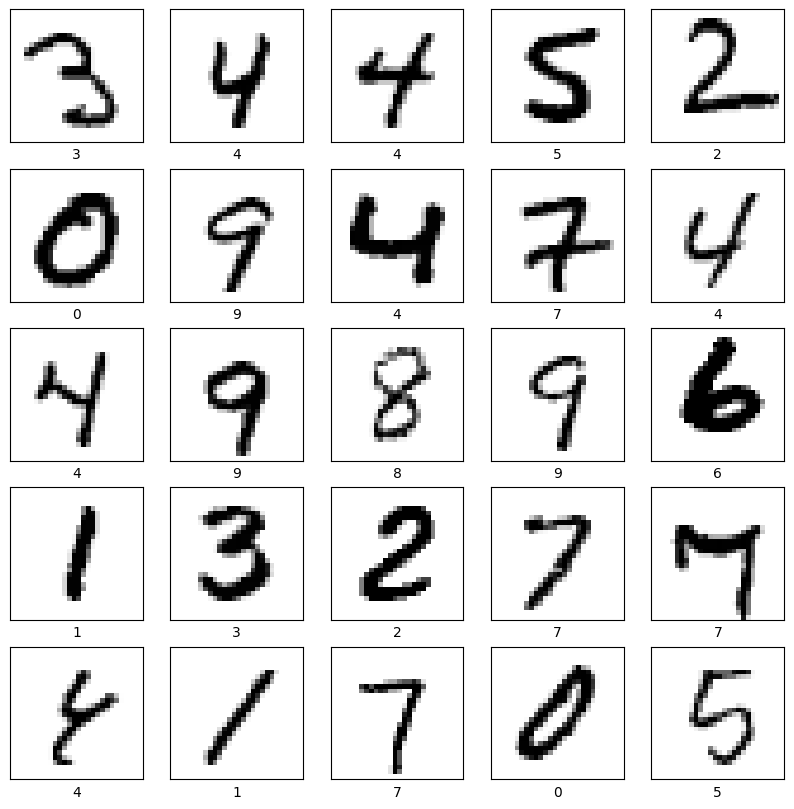

In [19]:
# Prediction and display it
predictions = get_predictions(x_test)
plot_images_sample(x_test, predictions)

# ***2. AlexNet***

In [20]:
# Define the AlexNet model
from keras.layers import Dense, Dropout, Flatten
model_alex = Sequential()
model_alex.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_alex.add(MaxPooling2D(pool_size=(2, 2)))
model_alex.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_alex.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
model_alex.add(Flatten())
model_alex.add(Dense(128, activation='relu'))
model_alex.add(Dropout(0.5))
model_alex.add(Dense(10, activation='softmax'))

In [23]:
model_alex.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [22]:
# Compile the model
model_alex.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# Train the model
history_alexnet = model_alex.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 8s 16ms/step - loss: 2.3127 - accuracy: 0.0991 - val_loss: 2.2958 - val_accuracy: 0.1115
Epoch 2/12
469/469 [==============================] - 7s 16ms/step - loss: 2.2892 - accuracy: 0.1295 - val_loss: 2.2738 - val_accuracy: 0.1647
Epoch 3/12
469/469 [==============================] - 7s 16ms/step - loss: 2.2680 - accuracy: 0.1640 - val_loss: 2.2527 - val_accuracy: 0.2262
Epoch 4/12
469/469 [==============================] - 7s 15ms/step - loss: 2.2479 - accuracy: 0.2013 - val_loss: 2.2314 - val_accuracy: 0.2873
Epoch 5/12
469/469 [==============================] - 7s 15ms/step - loss: 2.2265 - accuracy: 0.2414 - val_loss: 2.2084 - val_accuracy: 0.3465
Epoch 6/12
469/469 [==============================] - 7s 15ms/step - loss: 2.2017 - accuracy: 0.2870 - val_loss: 2.1820 - val_accuracy: 0.3887
Epoch 7/12
469/469 [==============================] - 7s 15ms/step - loss: 2.1756 - accuracy: 0.3264 - val_loss: 2.1514 - val_accuracy: 0.4449

In [1]:
# Evaluate the model on the test data
score = model_alex.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'model_alex' is not defined

313/313 - 1s - loss: 1.9358 - accuracy: 0.6748 - 975ms/epoch - 3ms/step


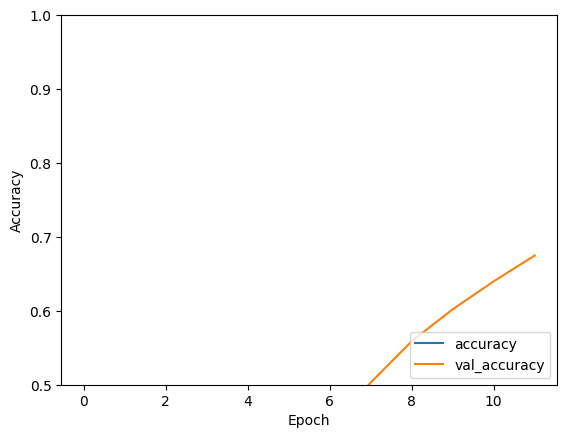

In [25]:
plt.plot(history_alexnet.history['accuracy'], label='accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model_alex.evaluate(x_test, y_test, verbose=2)

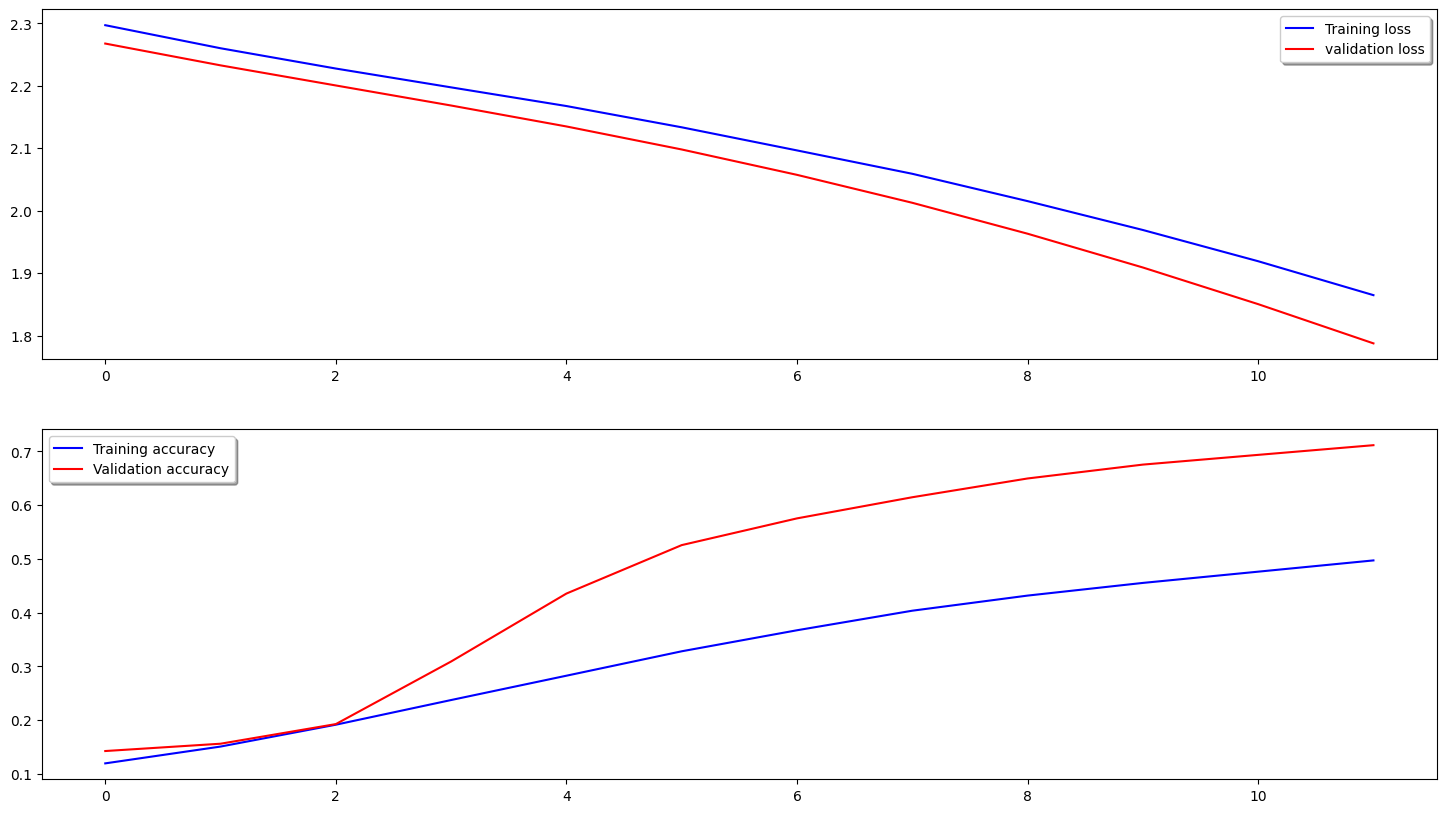

In [21]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history_alexnet.history['loss'], color='b', label="Training loss")
ax[0].plot(history_alexnet.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_alexnet.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_alexnet.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [26]:
def get_predictions(X_test):
    # Digits prediction
    predictions_alex = model_alex.predict(X_test)
    predictions_alex = np.argmax(predictions_alex, axis=1)
    return predictions_alex

313/313 [==============================] - 1s 3ms/step


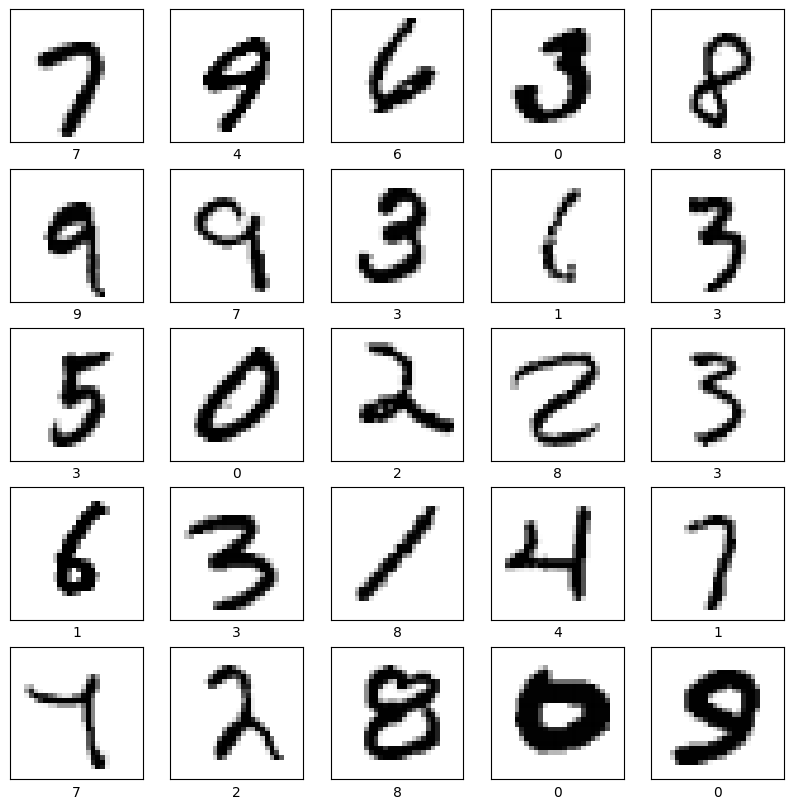

In [27]:
# Prediction and display it
predictions_alex = get_predictions(x_test)
plot_images_sample(x_test, predictions_alex)

# ***3. ZFNet***

In [22]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras

# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# # Preprocess the data
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

# # Reshape the data from (28, 28) to (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)

# # Convert the labels from integers to one-hot vectors
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

# # Define the model architecture
# model_zfnet = keras.Sequential([
#     keras.layers.Conv2D(96, (7, 7), activation='relu', padding='same', input_shape=(28, 28, 1)),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
#     keras.layers.Conv2D(384, (3, 3), activation='relu', padding='same'),
#     keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     keras.layers.MaxPooling2D(2, 2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [23]:
# # Compile the model
# model_zfnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history_zfnet = model_zfnet.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# # Evaluate the model on the test data
# test_loss, test_acc = model_zfnet.evaluate(x_test, y_test, verbose=0)
# print('Test accuracy:', test_acc)

In [24]:
# # Evaluate the model on the test data
# score_zf = model_zfnet.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# ***3. VGGNet***

In [28]:
from keras.optimizers import Adam

# build the model
model_vggnet = Sequential()
model_vggnet.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model_vggnet.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model_vggnet.add(MaxPooling2D(pool_size=(2,2)))
model_vggnet.add(Dropout(0.25))
model_vggnet.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vggnet.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model_vggnet.add(MaxPooling2D(pool_size=(2,2)))
model_vggnet.add(Dropout(0.25))
model_vggnet.add(Flatten())
model_vggnet.add(Dense(512, activation='relu'))
model_vggnet.add(Dropout(0.5))
model_vggnet.add(Dense(10, activation='softmax'))


In [30]:
model_vggnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [29]:
# compile the model
model_vggnet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model
history_vggnet = model_vggnet.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 29s 61ms/step - loss: 0.2064 - accuracy: 0.9337 - val_loss: 0.0404 - val_accuracy: 0.9864
Epoch 2/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0618 - accuracy: 0.9813 - val_loss: 0.0284 - val_accuracy: 0.9909
Epoch 3/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0261 - val_accuracy: 0.9910
Epoch 4/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0197 - val_accuracy: 0.9929
Epoch 5/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0227 - val_accuracy: 0.9931
Epoch 6/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0196 - val_accuracy:

In [31]:
# Evaluate the model on the test data
score = model_vggnet.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.017277123406529427
Test accuracy: 0.9943000078201294


313/313 - 2s - loss: 0.0173 - accuracy: 0.9943 - 2s/epoch - 7ms/step


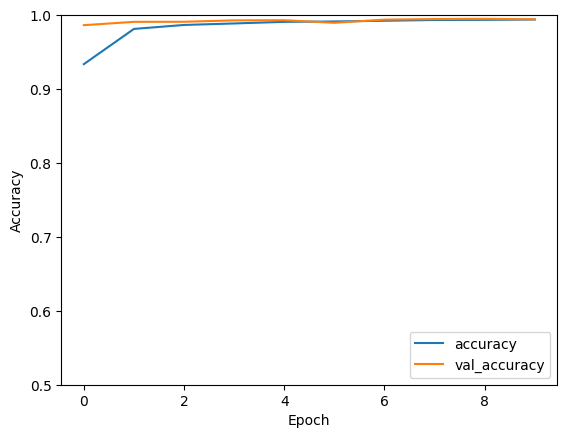

In [32]:
plt.plot(history_vggnet.history['accuracy'], label='accuracy')
plt.plot(history_vggnet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model_vggnet.evaluate(x_test, y_test, verbose=2)

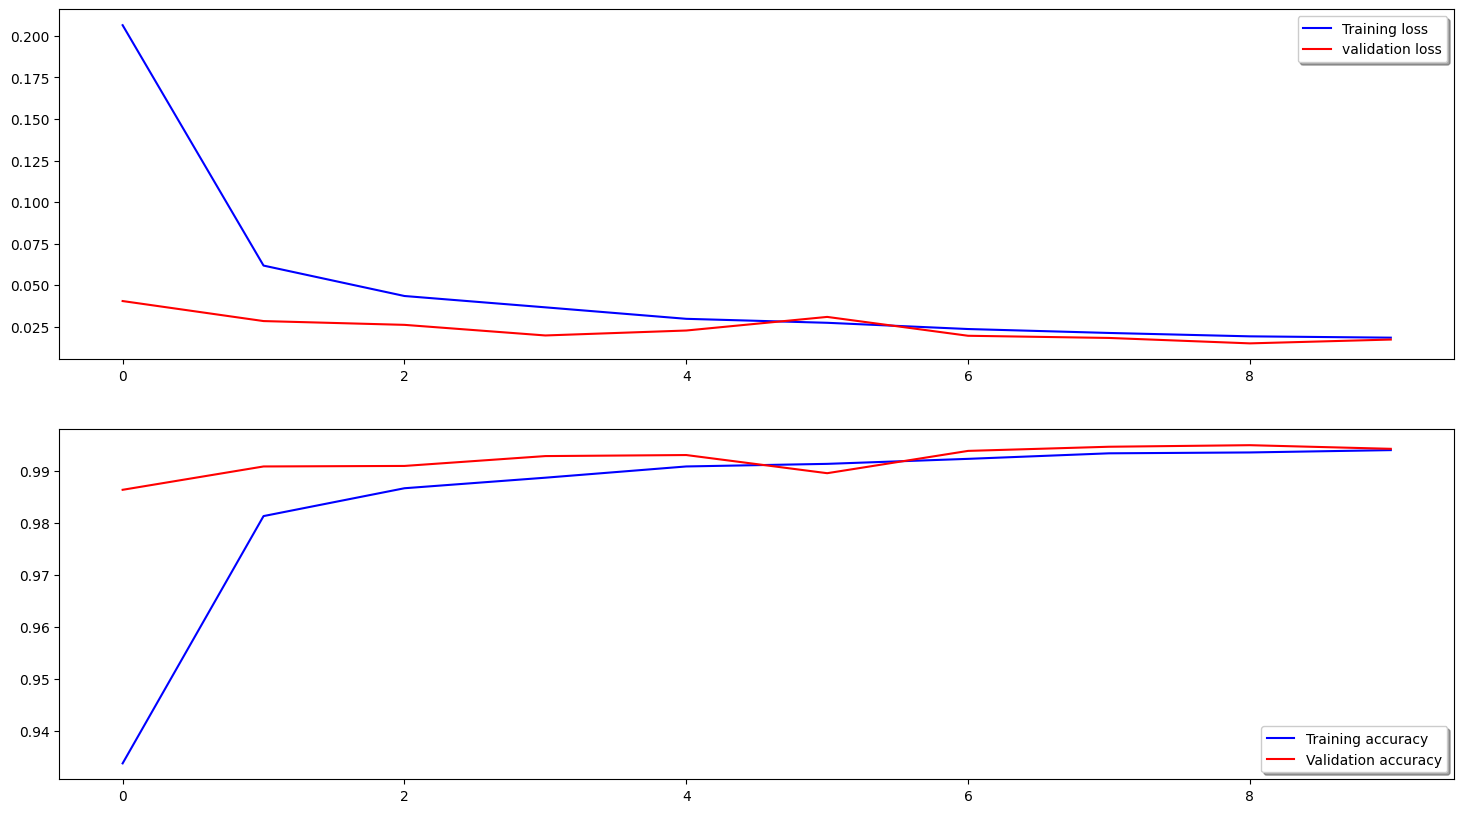

In [33]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history_vggnet.history['loss'], color='b', label="Training loss")
ax[0].plot(history_vggnet.history['val_loss'], color='r', label="validation loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_vggnet.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_vggnet.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [34]:
def get_predictions(X_test):
    # Digits prediction
    predictions_vggnet = model_vggnet.predict(X_test)
    predictions_vggnet = np.argmax(predictions_vggnet, axis=1)
    return predictions_vggnet

313/313 [==============================] - 2s 7ms/step


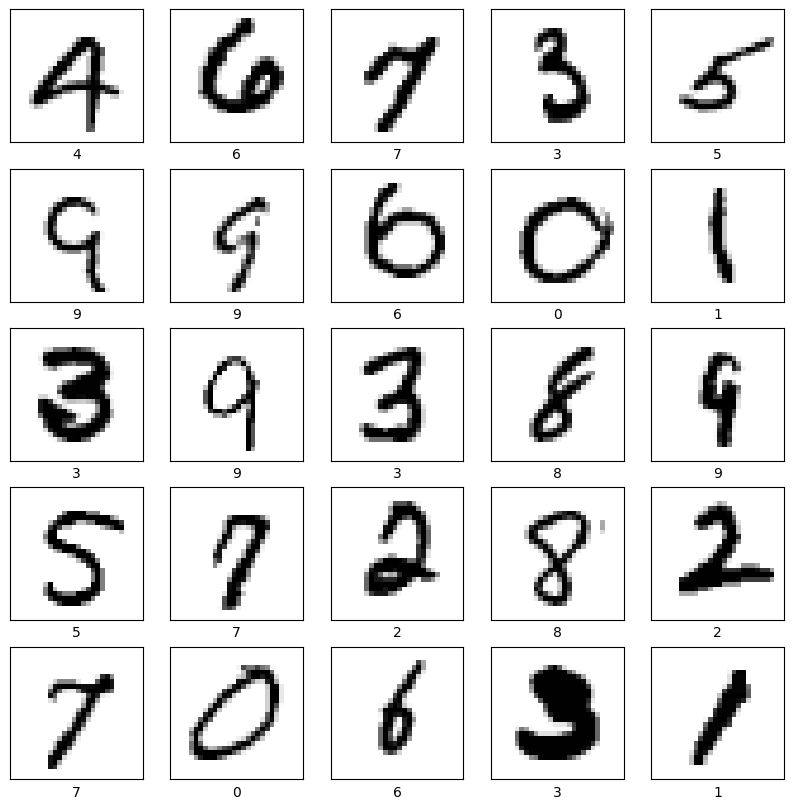

In [35]:
# Prediction and display it
predictions_vggnet = get_predictions(x_test)
plot_images_sample(x_test, predictions_vggnet)

# ***4. GoogLeNet***

In [36]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Model

input_img = Input(shape=(28, 28, 1))


# inception module 1
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

# inception module 2
tower_1 = Conv2D(128, (1,1), padding='same', activation='relu')(output)
tower_1 = Conv2D(128, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(128, (1,1), padding='same', activation='relu')(output)
tower_2 = Conv2D(128, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(output)
tower_3 = Conv2D(128, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)


In [37]:
# additional layers
output = AveragePooling2D((5,5), strides=(3,3), padding='valid')(output)
output = Flatten()(output)
output = Dense(1024, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(1024, activation='relu')(output)
output = Dropout(0.5)(output)
output = Dense(10, activation='softmax')(output)

model_gnet = Model(inputs=input_img, outputs=output)


In [38]:
# compile the model
model_gnet.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [39]:
model_gnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 28, 28, 64)   128         ['input_1[0][0]']                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 28, 28, 64)   128         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 28, 28, 1)   0           ['input_1[0][0]']                
                                                                                              

In [44]:

# train the model
# history_gnet = model_gnet.fit(x_train_16, y_train_16, batch_size=128, epochs=10, verbose=1, validation_data=(x_test_16, y_test_16))

In [40]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input
import numpy as np

(x_train_16, y_train_16), (x_test_16, y_test_16) = mnist.load_data()

# Reshape the data to have a depth channel
x_train_16 = x_train_16.reshape((x_train_16.shape[0], 28, 28, 1))
x_test_16 = x_test.reshape((x_test_16.shape[0], 28, 28, 1))

# Convert the data to float32 and normalize it between 0 and 1
x_train_16 = x_train_16.astype('float32')
x_test = x_test.astype('float32')
x_train_16 /= 255
x_test /= 255

# Convert the labels to categorical
y_train_16 = keras.utils.to_categorical(y_train_16, 10)
y_test_16 = keras.utils.to_categorical(y_test_16, 10)

# # Sample the data
# sample_size = 20000
# x_train_16 = x_train_16[:sample_size]
# y_train_16 = y_train_16[:sample_size]

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add the first convolutional block
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Add the second convolutional block
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Add the fully connected layer
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

# Create the model
model_16 = Model(inputs=input_layer, outputs=x)

# Compile the model
model_16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [41]:
model_16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 128)       147584    
                                                           

In [42]:
# Train the model
history_16 = model.fit(x_train_16, y_train_16, batch_size=32, epochs=10, validation_data=(x_test_16, y_test_16))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0393 - val_accuracy: 0.9876
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0386 - val_accuracy: 0.9880
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0174 - accuracy: 0.9941 - val_loss: 0.0484 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0413 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0341 - val_ac

In [43]:
# Evaluate the model on the test data
score = model_16.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3025827407836914
Test accuracy: 0.043699998408555984
